In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')

df = df.fillna(method = 'ffill')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
import plusmodules as pm

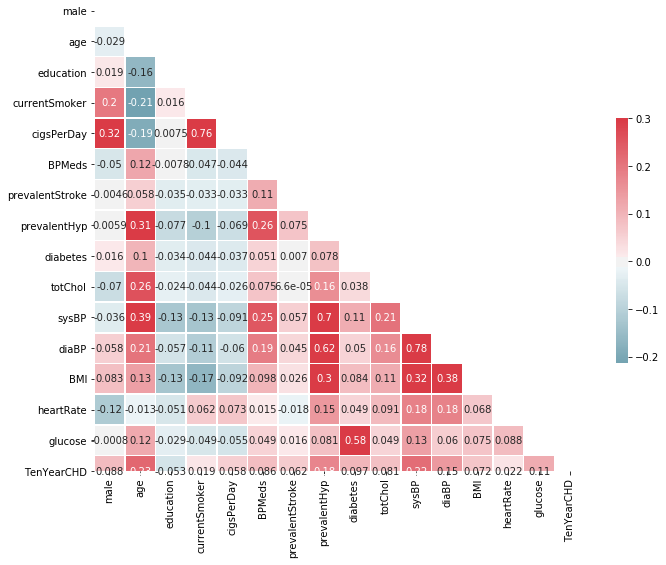

In [4]:
pm.corr_matrix(df)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix

In [6]:
y = df["TenYearCHD"]
X = df.drop("TenYearCHD",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
#rfc = RandomForestClassifier(n_estimators = 10)

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    #rfc = RandomForestClassifier()
    algo.fit(Xtrain,ytrain)
    y_prob_train = algo.predict_proba(Xtrain)[:,1]
    y_pred_train = algo.predict(Xtrain)

    y_prob_test = algo.predict_proba(Xtest)[:,1]
    y_pred_test = algo.predict(Xtest)


    print("Confusion_Matrix Train:","\n",confusion_matrix(ytrain,y_pred_train))
    print("Accuracy Train:",accuracy_score(ytrain,y_pred_train))

    print("\n"*2)
    print("Confusion_Matrix Test:","\n",confusion_matrix(ytest,y_pred_test))
    print("Accuracy Test:")
    print(accuracy_score(ytest,y_pred_test))

    print("\n"*2)
    print("AUC of Train:",roc_auc_score(ytrain,y_prob_train))
    print("AUC of Test:")
    print(roc_auc_score(ytest,y_prob_test))


## BASE MODEL

In [10]:
lr = LogisticRegression(solver='liblinear')

model_eval(lr,X_train,y_train,X_test,y_test)

Confusion_Matrix Train: 
 [[2505    6]
 [ 435   22]]
Accuracy Train: 0.8514150943396226



Confusion_Matrix Test: 
 [[1082    3]
 [ 176   11]]
Accuracy Test:
0.8592767295597484



AUC of Train: 0.7158742234387512
AUC of Test:
0.7455087606890264


## Undersampling

In [11]:
Xy_train = pd.concat([X_train,y_train],axis = 1)

In [12]:
Xy_train0 = Xy_train.loc[Xy_train["TenYearCHD"]==0]

In [13]:
Xy_train1 = Xy_train.loc[Xy_train["TenYearCHD"]==1]

In [14]:
len0  = len(Xy_train0)
len1 = len(Xy_train1)

In [18]:
print(len1)

457


In [17]:
print(len0)

2511


In [19]:
Xy_train0_us = Xy_train0.sample(len1,random_state=1)

In [24]:
Xy_train_us = pd.concat([Xy_train0_us,Xy_train1],axis = 0)

print(Xy_train_us["TenYearCHD"].value_counts())

1    457
0    457
Name: TenYearCHD, dtype: int64


In [25]:
X_train_us = Xy_train_us.drop("TenYearCHD",axis = 1)
y_train_us = Xy_train_us["TenYearCHD"]

In [26]:
model_eval(lr,X_train_us,y_train_us,X_test,y_test)

Confusion_Matrix Train: 
 [[306 151]
 [161 296]]
Accuracy Train: 0.6586433260393874



Confusion_Matrix Test: 
 [[718 367]
 [ 63 124]]
Accuracy Test:
0.6619496855345912



AUC of Train: 0.7079756187484738
AUC of Test:
0.738160132088026


In [27]:
#here same as base model, no improvement at all, so we will try with oversampling

## Oversampling

In [28]:
Xy_train = pd.concat([X_train,y_train],axis = 1)

In [29]:
Xy_train0 = Xy_train.loc[Xy_train["TenYearCHD"]==0]

In [30]:
Xy_train1 = Xy_train.loc[Xy_train["TenYearCHD"]==1]

In [31]:
len0  = len(Xy_train0)
len1 = len(Xy_train1)

In [32]:
print(len1)

457


In [33]:
print(len0)

2511


In [34]:
Xy_train1_os = Xy_train1.sample(len0,replace=True,random_state=1)

In [35]:
Xy_train_os = pd.concat([Xy_train1_os,Xy_train0],axis = 0)

print(Xy_train_os["TenYearCHD"].value_counts())

1    2511
0    2511
Name: TenYearCHD, dtype: int64


In [36]:
X_train_os = Xy_train_os.drop("TenYearCHD",axis = 1)
y_train_os = Xy_train_os["TenYearCHD"]

In [37]:
model_eval(lr,X_train_os,y_train_os,X_test,y_test)

Confusion_Matrix Train: 
 [[1666  845]
 [ 823 1688]]
Accuracy Train: 0.6678614097968937



Confusion_Matrix Test: 
 [[726 359]
 [ 56 131]]
Accuracy Test:
0.6737421383647799



AUC of Train: 0.7227883493433352
AUC of Test:
0.7534537568693166


In [38]:
# jus a slight improvement

## SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE(sampling_strategy="minority",random_state=1)


X_train_sm,y_train_sm = smote.fit_sample(X_train,y_train)


print("len0",len(y_train_sm[y_train_sm==0]))
print("len1",len(y_train_sm[y_train_sm==1]))

len0 2511
len0 2511


In [42]:

model_eval(lr,X_train_sm,y_train_sm,X_test,y_test)

Confusion_Matrix Train: 
 [[1687  824]
 [ 843 1668]]
Accuracy Train: 0.6680605336519315



Confusion_Matrix Test: 
 [[733 352]
 [ 81 106]]
Accuracy Test:
0.6595911949685535



AUC of Train: 0.7257170798149631
AUC of Test:
0.6898247862194731


In [43]:
#here smote is less significant compared to oversampling